# Assignment 1
### Team Members: Alex Kim, Bolun Zhang, Chu Nie, Davis Gill

### Scraper Script


In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

In [2]:
headers = {'Accept-Languages':"en-US,en;q=0.5"}
date = []
dateTime = []
message = []
old_pages = np.arange(1,110,1)
for page in old_pages:

    print(page)

    page = requests.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p'+str(page))
    soup = BeautifulSoup(page.text,'html.parser')

    comment_data = soup.findAll('div',attrs = {'class':'Comment'})

    sleep(randint(2,8))

    for c in comment_data:

        # Date and DateTime
        d = c.time.attrs['title'] # date
        dt = c.time.attrs['datetime'] # dateTime
        date.append(d)
        dateTime.append(dt)

        # Comment Body Paragraph
        comment = c.find('div', class_ = 'Message userContent').text
        message.append(comment)


old_luxury_sedan_comments = pd.DataFrame({'date':date, 'dateTime':dateTime, 'message': message})
old_luxury_sedan_comments = old_luxury_sedan_comments.drop_duplicates(['message'])
old_luxury_sedan_comments.reset_index(drop = True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


,date,dateTime,message
0,"March 24, 2002 10:54PM",2002-03-25T05:54:02+00:00,\nI personally think that with a few tweaks th...
1,"March 25, 2002 12:06AM",2002-03-25T07:06:29+00:00,\nI am debating a new purchase and these two a...
2,"March 25, 2002 10:02AM",2002-03-25T17:02:27+00:00,"\nGreat handling, RWD, excellent engine and th..."
3,"March 25, 2002 4:04PM",2002-03-25T23:04:37+00:00,\nAnd no manual tranny. That may not matter to...
4,"March 25, 2002 5:44PM",2002-03-26T00:44:13+00:00,\nOne beauty of BMW 3 Series is that there are...
...,...,...,...
5426,"August 1, 2006 6:35AM",2006-08-01T13:35:58+00:00,\nwill of course vary greatly depending on whe...
5427,"August 1, 2006 7:53AM",2006-08-01T14:53:55+00:00,\nYes. in 2003 I bought my 330i ZHP off a lot....
5428,"August 1, 2006 9:13AM",2006-08-01T16:13:23+00:00,"\nNo, I bought my ZHP off the lot in 2003 - I ..."
5429,"August 1, 2006 2:41PM",2006-08-01T21:41:31+00:00,"\nNo, I bought my ZHP off the lot in 2003 - I ..."


In [3]:
old_luxury_sedan_comments.to_csv('old_luxury_sedan_comments.csv')

### Task A

In [4]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import TreebankWordTokenizer

In [5]:
data = pd.read_csv('old_luxury_sedan_comments.csv')

tokenizer = TreebankWordTokenizer()
word_book = set()
words = []

for i in range(len(data)):

    m = data['message'][i]
    tokens = tokenizer.tokenize(m)
    for t in tokens:
        word_book.add(t.lower())
        words.append(t.lower())


counts = [(w, words.count(w)) for w in word_book]

def takeSecond(elem):
    return elem[1]

counts.sort(key = takeSecond,reverse = True)

w, c = zip(*counts)

top_100_words = w[0:100]
top_100_words_freq = c[0:100]

rank = np.arange(1,101)

# Theoretical Zipf's Law
constant = 1*c[0] # constant = rank * frequency
zipf_pred = constant / rank

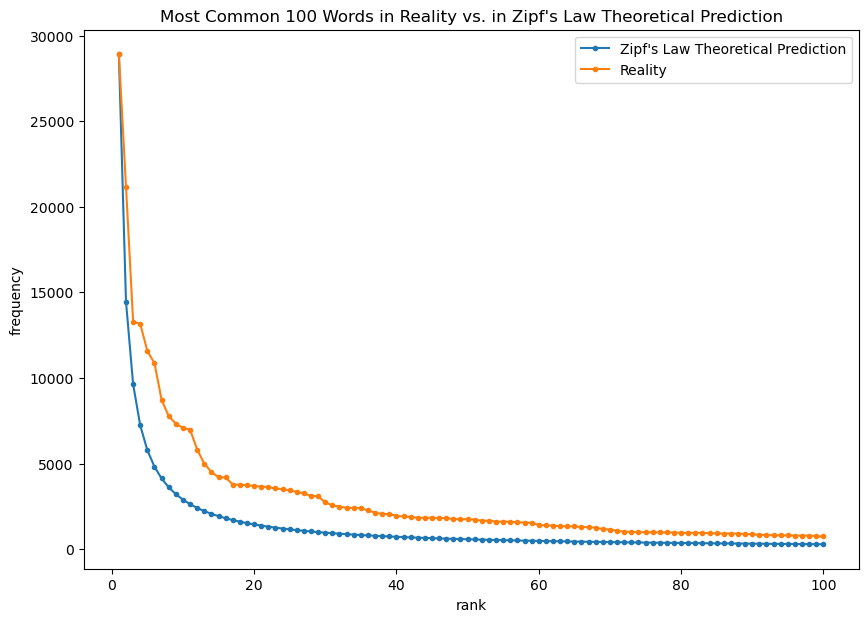

In [6]:
# Plot
plt.figure(figsize = (10,7))
plt.plot(rank,zipf_pred, marker = '.',label = "Zipf's Law Theoretical Prediction")
plt.plot(rank,top_100_words_freq, marker = '.',label = "Reality")
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title("Most Common 100 Words in Reality vs. in Zipf's Law Theoretical Prediction")
plt.legend()

plt.savefig('mostCommon100Words.svg',format = 'svg')

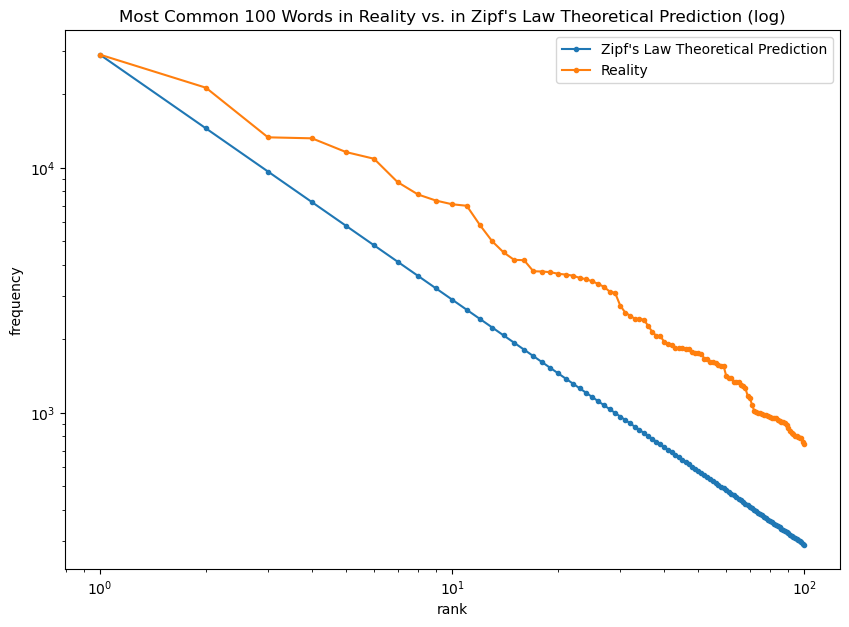

In [7]:
# Plot Log
plt.figure(figsize = (10,7))
plt.plot(rank,zipf_pred, marker = '.',label = "Zipf's Law Theoretical Prediction")
plt.plot(rank,top_100_words_freq, marker = '.',label = "Reality")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title("Most Common 100 Words in Reality vs. in Zipf's Law Theoretical Prediction (log)")
plt.legend()

plt.savefig('mostCommon100Words_log.svg',format = 'svg')

### TaskB

In [8]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

In [9]:
data = pd.read_csv('old_luxury_sedan_comments.csv')
car_info = pd.read_csv('car_models_and_brands.csv')

In [82]:
car_info[:50]

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx
5,acura,mdx
6,acura,rdx
7,acura,tsx
8,acura,rsx
9,audi,quattro


In [121]:
tokenizer = TreebankWordTokenizer()
words_unique = []
modelList = car_info.drop_duplicates()['Model'].to_list()
brandList = car_info.drop_duplicates()['Brand'].to_list()
non_brands = ['car', 'sedan', 'seat']
updated_brands = [x for x in brandList if x not in non_brands]



for i in range(len(data)):

    temp = set()
    m = data['message'][i]
    tokens = tokenizer.tokenize(m)

    for t in tokens:
        t = t.lower()
        if t in modelList:
            n = modelList.index(t)
            t = brandList[n]
            temp.add(t)
        else:
            temp.add(t)

    for x in temp:
        x = str(x)
        words_unique.append(x)


words_unique_english = pd.Series(words_unique).value_counts().to_frame().reset_index()
words_unique_english.rename(columns = {'index':'word',0:'count'},inplace = True)
words_unique_english= words_unique_english[words_unique_english['word'].apply(lambda x: x.isalpha())]

stopWords = stopwords.words('english')
df_clean = words_unique_english[words_unique_english['word'].isin(stopWords)==False] # without stopWords
car_brand_count = df_clean[df_clean['word'].isin(updated_brands)].sort_values(['count'], ascending = False)


In [122]:
car_brand_count.to_csv('car_brand_frequency.csv', index = False)

In [123]:
car_brand_count.rename(columns={'word': 'brand'}, inplace=True)
top_10_brands = car_brand_count.set_index('brand')['count']

top_10_brands.head(10)

brand
bmw           1501
acura          565
audi           449
honda          416
infiniti       402
nissan         293
toyota         293
problem        255
subaru         211
volkswagen     174
Name: count, dtype: int64

### Task C

In [124]:
top10_brands = ['bmw', 'acura', 'audi', 'honda', 'infiniti', 'nissan', 'toyota', 'mercedes', 'subaru', 'volkswagen']
possible_comb = []
from itertools import combinations

def pairs(lst):
    return list(combinations(lst, 2))

possible_comb = (pairs(top10_brands))

In [125]:
tokenizer = TreebankWordTokenizer()
all_sentence = []
all_sentence_d = []

for i in range(len(data)):
    sentence = set()
    sentence_d = []

    m = data['message'][i]
    tokens = tokenizer.tokenize(m)
    for t in tokens:
        sentence.add(t.lower())
        sentence_d.append(t.lower())

    all_sentence.append(sentence)
    all_sentence_d.append(sentence_d)


In [126]:
def index_difference(word1, word2, lst):
    try:
        index1 = lst.index(word1)
        index2 = lst.index(word2)
        return abs(index1 - index2)
    except ValueError:
        return None

In [127]:
pairs_count = {}

for pairs in possible_comb:
    pairs_count[pairs] = 0

for i in range (len(all_sentence)):
    for pairs in possible_comb:
        brand1 = pairs[0]
        brand2 = pairs[1]
        if brand1 in all_sentence[i] and brand2 in all_sentence[i] and index_difference(brand1, brand2, all_sentence_d[i])<=7:
            pairs_count[pairs] += 1

In [128]:
single_mention = pd.read_csv('car_brand_frequency.csv')
pairs_lift = {}
N = len(data)

for key, value in pairs_count.items():
    commen_mention = value
    single_value1 = single_mention[single_mention['word'] == key[0]]['count'].tolist()[0]
    single_value2 = single_mention[single_mention['word'] == key[1]]['count'].tolist()[0]
    pairs_lift[key] = N*value/(single_value1*single_value2)

    #print(key,value)
    #print(key[0], single_value1)
    #print(key[1], single_value2)

pairs_lift

{('bmw', 'acura'): 0.2241396591063185,
 ('bmw', 'audi'): 0.4432160296995767,
 ('bmw', 'honda'): 0.026093181468764413,
 ('bmw', 'infiniti'): 0.4140291215474924,
 ('bmw', 'nissan'): 0.04939596582937882,
 ('bmw', 'toyota'): 0.06174495728672353,
 ('bmw', 'mercedes'): 0.7486043786900687,
 ('bmw', 'subaru'): 0.06859250231283409,
 ('bmw', 'volkswagen'): 0.04158913214944826,
 ('acura', 'audi'): 0.3211265940043755,
 ('acura', 'honda'): 0.18485364193328796,
 ('acura', 'infiniti'): 1.3868621494298419,
 ('acura', 'nissan'): 0.1640339484732248,
 ('acura', 'toyota'): 0.09842036908393488,
 ('acura', 'mercedes'): 0.24859627708269758,
 ('acura', 'subaru'): 0.13666904332508492,
 ('acura', 'volkswagen'): 0.0,
 ('audi', 'honda'): 0.05815273256810005,
 ('audi', 'infiniti'): 0.6017795211027269,
 ('audi', 'nissan'): 0.0,
 ('audi', 'toyota'): 0.0,
 ('audi', 'mercedes'): 1.2512863835342907,
 ('audi', 'subaru'): 0.28662958232618035,
 ('audi', 'volkswagen'): 0.13903182039269898,
 ('honda', 'infiniti'): 0.0649516

### Task D

## Task E

## Task F

In [21]:
data.head()

,Unnamed: 0,date,dateTime,message
0,0,"March 24, 2002 10:54PM",2002-03-25T05:54:02+00:00,\nI personally think that with a few tweaks th...
1,1,"March 25, 2002 12:06AM",2002-03-25T07:06:29+00:00,\nI am debating a new purchase and these two a...
2,2,"March 25, 2002 10:02AM",2002-03-25T17:02:27+00:00,"\nGreat handling, RWD, excellent engine and th..."
3,3,"March 25, 2002 4:04PM",2002-03-25T23:04:37+00:00,\nAnd no manual tranny. That may not matter to...
4,4,"March 25, 2002 5:44PM",2002-03-26T00:44:13+00:00,\nOne beauty of BMW 3 Series is that there are...


In [129]:
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
word_freq = {}
def get_word_freq(c):
    #take set because we only want to count a word once per comment
    tokens = set(word_tokenize(c))
    for token in tokens:
        #disregard if it is punctuation or stop word
        if (not token.isalpha()) or (token in stop_words):
            continue
        if token not in word_freq:
            word_freq[token] = 1
        else:
            word_freq[token] += 1
    return None
data['message'].map(get_word_freq)
potential_attributes = pd.Series(word_freq)
potential_attributes = potential_attributes.sort_values(ascending=False)

potential_attributes[:50]


I              3681
car            2144
The            1525
like           1319
cars           1301
BMW            1237
would          1189
one            1144
get            1054
TL             1020
think          1005
It              873
much            793
better          768
drive           764
know            689
new             681
If              665
even            661
really          648
people          645
performance     630
good            613
driving         605
want            601
still           561
say             551
way             543
time            532
But             531
sedan           527
also            522
see             521
well            515
could           514
make            510
That            503
You             502
go              479
best            461
And             456
buy             456
engine          446
going           441
price           437
luxury          428
great           417
years           414
many            412
right           409


Some of these words are not truly attributes. The top five words that we would consider as attributes are **performance**, **engine**, **price**, **luxury**, and **handling**.

In [131]:
top_5_attributes = ["performance", "engine", "price", "luxury", "handling"]

def get_brand_attr_lift(brand, attribute):
    freq_brand = top_10_brands[brand]
    freq_attribute = freq_df[attribute]
    freq_both = 0
    for comment in list(data['message'].values):
        if brand in comment and attribute in comment:
            freq_both += 1
  #calculate lift
    return (len(data)*freq_both)/(freq_brand * freq_attribute)

brand_attr_lifts = pd.DataFrame(data = 0, index = top_10_brands[:5].index, columns=top_5_attributes)
brand_attr_lifts.head()
for brand in top_10_brands[:5].index:
    for attr in top5_attr:
        brand_attr_lifts.loc[brand, attr] = get_brand_attr_lift(brand, attr)
brand_attr_lifts


,performance,engine,price,luxury,handling
brand,,,,,
bmw,0.086149,0.121690,0.215274,0.076085,0.099007
acura,0.106804,0.237077,0.175971,0.067377,0.167380
audi,0.307194,0.488170,0.387507,0.197828,0.240712
honda,0.165781,0.058544,0.238998,0.213521,0.064952
infiniti,0.150111,0.121165,0.216407,0.126261,0.134427


## Task G

In [11]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexkim/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True